<a href="https://colab.research.google.com/github/yogesh2300/Meditech-Medical-Recommendation-sysytem/blob/main/water_potability_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np

In [ ]:
#load Dataset
data = pd.read_csv("water_potability.csv",)
print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [ ]:
#Check for Missing Values
print("Missing values:\n", data.isnull().sum())

Missing values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

#Split data into featues and target
X = data.drop('Potability', axis=1)
y = data['Potability']



In [ ]:
from sklearn.impute import SimpleImputer
# Handle Missing Values (only for features)
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
#training and testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=1)
X_train.shape

(2620, 9)

In [ ]:
y_train.shape

(2620,)

In [ ]:
#Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6371951219512195


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[329  44]
 [194  89]]


In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Potable", "Potable"]))


Classification Report:
              precision    recall  f1-score   support

 Not Potable       0.63      0.88      0.73       373
     Potable       0.67      0.31      0.43       283

    accuracy                           0.64       656
   macro avg       0.65      0.60      0.58       656
weighted avg       0.65      0.64      0.60       656



In [ ]:
#Feature Importances
importances = rf.feature_importances_
features = np.array(X.columns)

In [ ]:
#Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]


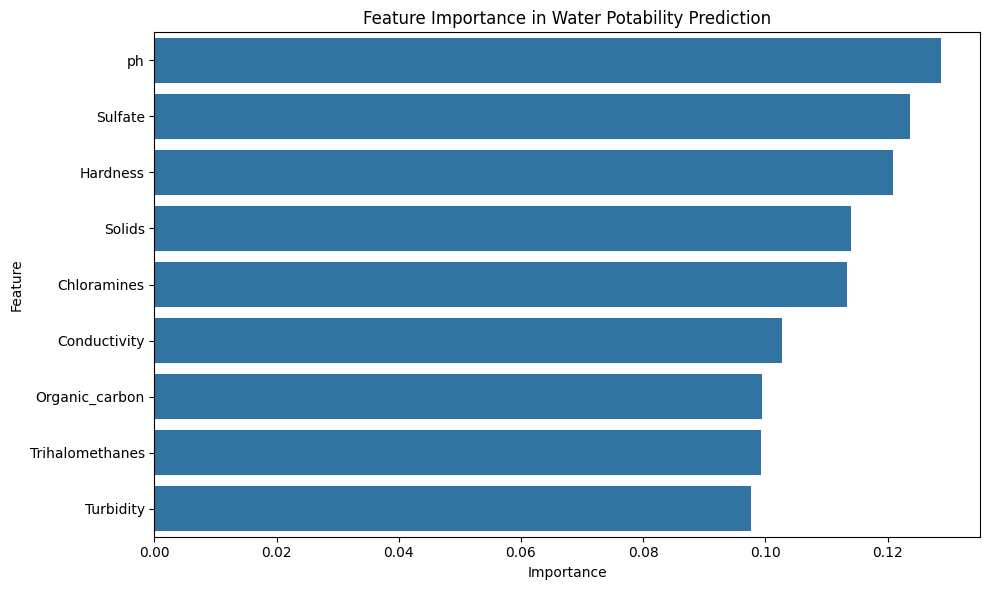

In [ ]:
#Plot the features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Feature Importance in Water Potability Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
#sample prediction by taking user inputs

custom_input={
    'ph':6.788292,
    'Hardness':182.0369,
    'Solids':25661.36,
    'Chloramines':6.939853,
    'Sulfate':352.3449,
    'Conductivity':419.8959,
    'Organic_carbon':11.83538,
    'Trihalomethanes':71.43604,
    'Turbidity':4.255948
}
custom_df=pd.DataFrame([custom_input])

custom_df_imputed = pd.DataFrame(imputer.transform(custom_df), columns=custom_df.columns)

custom_prediction = rf.predict(custom_df_imputed)[0]
custom_proba = rf.predict_proba(custom_df_imputed)[0][1]

# Result
if custom_prediction == 1:
    result = "Potable (Safe to drink)"
else:
    result = "Not Potable  (Unsafe to drink)"

print("Custom Water Sample Prediction:")
print(custom_df)
print("\nPrediction:", result)
print("Confidence (Potability Probability):", round(custom_proba, 2))


Custom Water Sample Prediction:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  6.788292  182.0369  25661.36     6.939853  352.3449      419.8959   

   Organic_carbon  Trihalomethanes  Turbidity  
0        11.83538         71.43604   4.255948  

Prediction: Potable (Safe to drink)
Confidence (Potability Probability): 0.86
